In [2]:
using Distributions
using Plots

using StatsBase
using DataStructures
using Parameters
using LinearAlgebra
using Random
include("cutoff.jl")

hitting_time_pr (generic function with 1 method)

In [3]:
N = Normal(0,1)
U = Uniform(-1, 1)
# Dist = Uniform(-1, 1)

Uniform{Float64}(a=-1.0, b=1.0)

In [ ]:
# Plot the dist of W * X
k = 1 # number of terms in the sum
n = 10

function product_of_Dists(D₁, D₂, n)
    ps = Vector{Float64}()
    for i = 1:n
        a = rand(D₁)
        b = rand(D₂)
        push!(ps, a * b)
    end
    ps
end

function sum_of_products(k, D₁, D₂, n)
    """ Returns the sum of ``k" products X⋅Y where X ∼ Dist and Y ∼ Dist.
    """
    sums = zeros(n)
    
    for i = 1:k
        sums .+= product_of_Dists(D₁, D₂, n)
    end
    
    sums
end

sums = sum_of_products(k, U, N, n)

grid_size = 0.001
eps = grid_size / 2
bins = -k-eps:grid_size:k+eps
hist = normalize(fit(Histogram, sums, bins), mode=:pdf)
plot(hist)

In [ ]:
# Plot the dist of tanh(W * X)
n = 100000
ps = Vector{Float64}()
for i = 1:n
    a = rand(Dist)
    b = rand(Dist)
    push!(ps, tanh(a * b))
end

bins = -1:0.01:1
hist = normalize(fit(Histogram, ps, bins), mode=:pdf)
plot(hist)

In [ ]:
d = fit(Normal, hist.weights)

xs = range(-k, k; length = 10000)
plot(xs, pdf.(d, xs))

In [ ]:
d

In [ ]:
bins

In [ ]:
N = Normal(0,1)
U = Uniform(-1, 1)

ps = Vector{Float64}()
for i = 1:n
    a = rand(N)
    b = rand(U)
    push!(ps, a * b)
end

hist = normalize(fit(Histogram, ps, bins), mode=:pdf)
plot(hist)

In [ ]:
function f(eps)
    atanh(eps) - ln(atanh(eps))
end

function t1(eps)
    atanh(eps)* (1 - ln(atanh(eps)))
end

In [ ]:
eps = 0.01:0.01:0.99

In [ ]:
ys = atanh.(eps)
zs = -ln.(atanh.(eps))
fs = f.(eps)
ts = t1.(eps)
plot(ys, label="atanh(eps)")
plot!(zs, label="-ln(atanh(eps))")
plot!(fs, label="fs")
plot!(ts, label="ts")

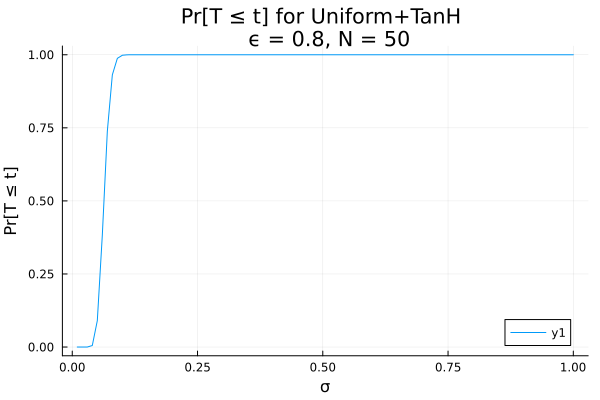

In [68]:
N = Normal(0,1)
eps = 0.8
n = 50
numer = atanh(eps) / √n
f(x) = 1 - (2 * cdf(N, numer/x) - 1)^n

xs = 0.01:0.01:1

p = plot(xs, f,     
    title="Pr[T ≤ t] for Uniform+TanH \n ϵ = $eps, N = $n",
    xlabel="σ",
    ylabel="Pr[T ≤ t]"
)
display(p)

#### 

In [46]:
k = 0.2
for n=1:10
    println((1-k)^n)
end

0.8
0.6400000000000001
0.5120000000000001
0.4096000000000001
0.3276800000000001
0.2621440000000001
0.20971520000000007
0.1677721600000001
0.13421772800000006
0.10737418240000006


In [49]:
println(0.8^7)
println(0.6^7)

0.20971520000000007
0.027993599999999993


In [50]:
println(0.8^12)
println(0.6^12)

0.06871947673600004
0.002176782335999999


In [69]:
sigma = 0.063
f(sigma)

0.49721020927667814

In [71]:
f(0.063)

0.49721020927667814

In [72]:
f(0.064)

0.5350202374877228

In [82]:
x = 0.5
del = 0
denom = x + del
cdf(N, numer/denom)

0.621998758539387

In [83]:
del = 0.02
denom = x + del
cdf(N, numer/denom)

0.6174472471722471